In [1]:
%load_ext autoreload
%aimport data_creater
%autoreload 1

from data_creater import *

Python module importing and autoreloading are demonstrated in this code snippet. It is commonly used during development to ensure that any changes made to modules are automatically reloaded without needing to restart the interpreter. In the first line, the autoreload extension is activated. This extension allows for the automatic reloading of modules before executing code, ensuring that any modifications made to the modules are immediately reflected. By importing data_creater on line two, the module is automatically reloaded. The `%aimport` command is specific to IPython and imports the module for autoreloading purposes. The third line sets the autoreload mode to 1. This mode configures the autoreload feature to only reload modules that have been explicitly imported or accessed, rather than reloading all modules. Lastly, import all objects (classes, functions, variables) from the `data_creater` module. Without qualifying the objects with the module name, it is easy to access the objects within a module.

In summary, this code enables the autoreload extension, imports the `data_creater` module for autoreloading, sets the autoreload mode, and imports all objects from the module. During development, any changes to the module are automatically reloaded and accessible.

In [2]:
stocks = companies()
tickers = stocks.values.tolist()

#Select stock to perform tests
ticker = tickers[2][1]

print("Stock ticker selected for testing: {}".format(ticker))

Stock ticker selected for testing: AAPL


This code snippet involves retrieving a list of stocks and selecting a specific stock for testing. It likely calls a function or retrieves a dataset with stock data. The returned result is assigned to the variable `stocks`. This second line extracts the values and converts them into a nested list. Assign this list to the variable `tickers`. Each element in the nested list likely represents a stock and its associated information. The code selects a specific stock from the ticker list. The stock at index 2 and the second element within that stock (index 1) are selected in this case. This specific stock is assigned to the variable `ticker`. The code then prints a message indicating which ticker has been selected for testing. The `print()` function is used along with a formatted string to display the selected stock ticker in the message.

To test a stock ticker, this code retrieves a list of stocks, converts their values into a nested list, selects a stock ticker from the list, and prints it out. Within a larger dataset, it provides a way to identify and work with specific stocks.

In [3]:
import numpy as np
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, Bidirectional
from keras.optimizers import RMSprop

def fixed_model(X,y, learn_rate):
    model = Sequential()
    model.add(LSTM(5,input_shape=(X.shape[1:])))
    model.add(Dense(y.shape[1], activation='tanh'))
      
    # compile the model
    optimizer = RMSprop(lr=learn_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

def dynamic_model(X,y, learn_rate):
    model = Sequential()
    model.add(LSTM(X.shape[1],input_shape=(X.shape[1:])))
    model.add(Dense(y.shape[1], activation='tanh'))
      
    # compile the model
    optimizer = RMSprop(lr=learn_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

def bidirectional_model(X,y, learn_rate):
    model = Sequential()
    model.add(Bidirectional(LSTM(X.shape[1],return_sequences=False), input_shape=(X.shape[1:])))
    model.add(Dense(X.shape[1]))
    model.add(Dense(y.shape[1], activation='tanh'))
      
    # compile the model
    optimizer = RMSprop(lr=learn_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

def stacked_model(X,y, learn_rate):
    model = Sequential()
    model.add(LSTM(10,return_sequences=True, input_shape=(X.shape[1:])))
    model.add(LSTM(5))
    model.add(Dense(y.shape[1], activation='tanh'))
      
    # compile the model
    optimizer = RMSprop(lr=learn_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

#Create list of our models for use by the testing function.
models =[]
models.append(("Fixed",fixed_model))
models.append(("Dynamic",dynamic_model))
models.append(("Bidirectional",bidirectional_model))
models.append(("Stacked",stacked_model))

Using TensorFlow backend.


This code snippet defines multiple machine learning models using the Keras library for different architectures and configurations.

The code starts by importing the necessary libraries, including NumPy and Pandas for data manipulation, and the relevant classes and functions from the Keras library, such as `Sequential`, `Dense`, `LSTM`, `Dropout`, `Bidirectional`, and `RMSprop`.

Next, there are four functions defined: `fixed_model`, `dynamic_model`, `bidirectional_model`, and `stacked_model`. Each function represents a different model architecture. LSTM is used initially, followed by fully connected Dense layers. Based on the shape of the input data, the number of LSTM units and input shape are determined. The model is compiled using the RMSprop optimizer with a specified learning rate.

The `dynamic_model` function is similar to the `fixed_model` but sets the number of LSTM units to be equal to the number of features in the input data.

The `bidirectional_model` function adds a bidirectional wrapper around the LSTM layer to allow information to be processed in both directions. Dense layers are also included. The model is compiled similarly to the previous functions. The stacked_model function builds stacked LSTM models. The return_sequences=True argument ensures that the output from the first LSTM layer is passed as input to the next one. A Dense layer is also included. The model is compiled in the same manner as the others. To store the models, we create a list named "models". A string label indicating the type of model and its corresponding function name are appended to this list as a tuple. This list can be used for testing or further analysis. The code defines different types of machine learning models with different LSTM architectures and configurations. Time series analysis or sequence prediction can be performed using these models. The `models` list makes it easy to access and use these models.

In [4]:
from collections import OrderedDict

def test_model(ticker,epochs,models,seq,window_sizes):
    #test result data
    sizes = []
    #seq_name = []
    model_name = []
    train_errors = []
    test_errors = []
    param_count = []
    
    for window_size in window_sizes:
        print("\nWindow size: {}".format(window_size))
        print('----------------')
        for model_item in models:
            seq_obj = seq[1](ticker,window_size,1)
            X_train,y_train,X_test,y_test = split_data(seq_obj)
            model = model_item[1](X_train,y_train,0.001)
            
            # fit model!
            model.fit(X_train, y_train, epochs=epochs, batch_size=50, verbose=0)

            # print out training and testing errors
            training_error = model.evaluate(X_train, y_train, verbose=0)
            testing_error = model.evaluate(X_test, y_test, verbose=0)
            msg = " > Model: {0:<15} Param count: {1:} \tTraining error: {2:.4f}\tTesting error: {3:.4f}"
            print(msg.format(model_item[0],model.count_params(),training_error,testing_error))

            #update result variables
            param_count.append(model.count_params())
            sizes.append(window_size)
            #seq_name.append(seq[0])
            model_name.append(model_item[0])
            train_errors.append(float("{0:.4f}".format(training_error)))
            test_errors.append(float("{0:.4f}".format( testing_error)))

    table= OrderedDict()
    table['Window Size'] = sizes
    table['Sequence Name'] =  [seq[0] for _ in range(len(sizes))]
    table['Model Name'] = model_name
    table['Ticker'] = [ticker for _ in range(len(sizes))]
    table['Training Error'] = train_errors
    table['Testing Error'] = test_errors
    table['Param Count'] = param_count
        
    return table


def update_test_table(*argv):
    file_path = "./data/model_test.csv"
    
    table = pd.read_csv(file_path)
    tickers = set( table['Ticker'].values.tolist())
    
    for item in argv:

        #first check if already exist 
        check = item['Ticker'][0]
        if check in tickers:
            #drop items
            idx = table[(table['Ticker']== check)  &  (table['Sequence Name']== item['Sequence Name'][0])].index
            table =  table.drop(idx)

        #append current test
        table = table.append(pd.DataFrame(item))

    table = table.reset_index(drop=True)
    table.to_csv(file_path, index = False)

def get_test_table():
    file_path = "./data/model_test.csv"
    return pd.read_csv(file_path)

It provides functions for testing machine learning models with different configurations and storing test results as tables. This function has many parameters, including a stock ticker, a number of epochs, a list of models, a sequence object, and window sizes. To store the test result data, a number of variables are initialized in the function, including size (window size), model_name (model name), train_errors (training errors), test_errors (testing errors), and param_count (number of model parameters). A nested loop is then performed over the window sizes and models in the function. Depending on the window size and model, it creates a sequence object and divides the data into training and testing sets. The appropriate model function is called to create the model with the given training data and a fixed learning rate of 0.001. The model is then trained using the fit() function, which specifies the training data, number of epochs, and batch size. With the evaluate() function, the training and testing errors are evaluated, and the results are displayed after training. By appending parameters to the result variables such as the model count parameters, window size, model name, training error, and testing error, the function updates the result variables. Upon completion of the function, a Tabular OrderedDict is created, which organizes the result variables into a tabular format. The keys of the dictionary represent the column names, and the corresponding lists contain the values. For updating a CSV file, the function update_test_table takes variable arguments (argv). By comparing tickers, it checks for duplicates in the existing table. The previous entry is dropped if a duplicate is found. The new test result is then appended to the table, and the updated table is saved back to the file.

The `get_test_table` function retrieves the test table from the CSV file and returns it as a pandas DataFrame.

In summary, these functions work together to test machine learning models with different configurations, record the test results in a table format, update an existing test table, and retrieve the test table for further analysis or reporting.

In [5]:
seed = 7
np.random.seed(seed)

#Model testing variables
epochs =100
window_sizes =[5,7,10,20]

This code snippet sets the seed for random number generation and initializes variables related to model testing. The first line sets the seed value to 7. We can ensure reproducibility of random processes by setting the seed to a specific value. In this case, the seed is set to 7. The following line sets the seed for NumPy's random number generator: np.random.seed(seed). The code will generate the same sequence of numbers if it is executed multiple times using NumPy functions. The seed value used is the one set in the previous line. In the third line, epochs is initialized to 100. In machine learning, epochs are the number of times the entire dataset is passed forward and backward through a model. In this case, it suggests that the model will undergo 100 iterations of training. In the fourth line, window_sizes is initialized as a list of four integers: 5, 7, 10, and 20. It is likely that these values represent different window sizes used in analysis or modeling. When making predictions or analyzing patterns in a sequence or time series, window size refers to the number of previous data points or time steps taken into account. In summary, this code snippet sets the seed for the random number generator to ensure reproducibility and initializes variables related to model testing, such as the number of epochs and a list of window sizes. In the code, these variables are used for further analysis or experimentation.

In [6]:
print("*** Simple Sequence Model Test for {} ***".format(ticker))
print("=" * 45)

seq_name = ('Simple',SimpleSequence)

test_1  = test_model(ticker,epochs,models,seq_name,window_sizes)
update_test_table(test_1)

*** Simple Sequence Model Test for AAPL ***

Window size: 5
----------------
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
 > Model: Fixed           Param count: 146 	Training error: 0.0024	Testing error: 0.0749
 > Model: Dynamic         Param count: 146 	Training error: 0.0024	Testing error: 0.0711
 > Model: Bidirectional   Param count: 341 	Training error: 0.0014	Testing error: 0.0197
 > Model: Stacked         Param count: 806 	Training error: 0.0020	Testing error: 0.0229

Window size: 7
----------------
 > Model: Fixed           Param count: 146 	Training error: 0.0017	Testing error: 0.0558
 > Model: Dynamic         Param count: 260 	Training error: 0.0016	Testing error: 0.0264
 > Model: Bidirectional   Param count: 617 	Training error: 0.0018	Testing error: 0.0240
 > Model: Stacked         Param count: 806 	Training error: 0.0022	Testing error: 0.0114

Window size: 10
---------------

This code snippet performs a simple sequence model test for a specific stock, and it includes printing the test header, executing the model test, and updating the test table.

The first line `print("*** Simple Sequence Model Test for {} ***".format(ticker))` prints a formatted message indicating that a simple sequence model test is being conducted for a particular stock. The placeholder '{}' is filled with the value of the `ticker` variable, representing the stock being tested.

The second line `print("=" * 45)` prints a line of equal signs ('=') to create a visual separation or separator between the test header and the test results.

The third line `seq_name = ('Simple', SimpleSequence)` assigns a tuple to the variable `seq_name`. There are two elements in the tuple: 'Simple' and 'SimpleSequence'. These values likely represent the name or type of the sequence model being tested.

The fourth line `test_1 = test_model(ticker, epochs, models, seq_name, window_sizes)` calls the `test_model` function with the appropriate parameters, including the stock ticker, the number of epochs, the models list, the sequence name, and the list of window sizes. This function performs the actual testing of the model and returns a result table. The fifth line updates the test table using the function update_test_table. It passes the result table test_1 as an argument. A test table is read from a file, checked for duplicates, any previous entries for the same stock and sequence name are dropped, and a new test result is appended. The updated table is then saved back to the file. To summarize, this code snippet executes a simple sequence model test. A test header is printed, the model test is performed, and the result is updated in the test table. The tabular format of this process allows for tracking and recording the performance of the model for different stocks and configurations.

In [7]:
print("*** Multi Sequence Model Test for {} ***".format(ticker))
print("=" * 45)

seq_name = ('Multi',MultiSequence)

test_2  = test_model(ticker,epochs,models,seq_name,window_sizes)
update_test_table(test_2)

*** Multi Sequence Model Test for AAPL ***

Window size: 5
----------------
 > Model: Fixed           Param count: 186 	Training error: 0.0015	Testing error: 0.0716
 > Model: Dynamic         Param count: 186 	Training error: 0.0017	Testing error: 0.0733
 > Model: Bidirectional   Param count: 421 	Training error: 0.0014	Testing error: 0.0616
 > Model: Stacked         Param count: 886 	Training error: 0.0014	Testing error: 0.0366

Window size: 7
----------------
 > Model: Fixed           Param count: 186 	Training error: 0.0013	Testing error: 0.0447
 > Model: Dynamic         Param count: 316 	Training error: 0.0016	Testing error: 0.0645
 > Model: Bidirectional   Param count: 729 	Training error: 0.0011	Testing error: 0.0466
 > Model: Stacked         Param count: 886 	Training error: 0.0013	Testing error: 0.0212

Window size: 10
----------------
 > Model: Fixed           Param count: 186 	Training error: 0.0013	Testing error: 0.0736
 > Model: Dynamic         Param count: 571 	Training err

This code snippet performs a multi-sequence model test for a specific stock, including printing the test header, executing the model test, and updating the test table.

The first line `print("*** Multi Sequence Model Test for {} ***".format(ticker))` prints a formatted message indicating that a multi-sequence model test is being conducted for a particular stock. The placeholder '{}' is filled with the value of the `ticker` variable, representing the stock being tested.

The second line `print("=" * 45)` prints a line of equal signs ('=') to create a visual separation or separator between the test header and the test results.

The third line `seq_name = ('Multi', MultiSequence)` assigns a tuple to the variable `seq_name`. A tuple consists of two elements: 'Multi' and 'MultiSequence'. These values likely represent the name or type of the multi-sequence model being tested.

The fourth line `test_2 = test_model(ticker, epochs, models, seq_name, window_sizes)` calls the `test_model` function with the appropriate parameters, including the stock ticker, the number of epochs, the models list, the sequence name, and the list of window sizes. This function performs the actual testing of the model and returns a result table. The fifth line updates the test table using the update_test_table function. 'test_2' is passed as an argument to this function. The function reads the existing test table from a file, checks for duplicate entries, deletes any previous entries for the same stock and sequence name, and adds the new test result. The updated table is then saved back to the file. This code snippet runs a multi-sequence model test. Prints a test header, performs the model test, and updates the test table. In a tabular format, the multi-sequence model can be tracked and recorded for different stocks and configurations.

In [8]:
table = get_test_table()

This code snippet retrieves a test table from a file and assigns it to the variable `table`. DataFrame is returned as a result of calling the get_test_table function. The file path is likely predefined and points to a CSV file containing the test table data.

The returned test table is then assigned to the variable `table`, making it available for further analysis or processing within the code.

In summary, this code retrieves a test table from a file and stores it in the `table` variable. Test tables contain previously recorded test results that can be analyzed, visualized, or reported on.

In [9]:
pd.pivot_table(table, values=['Training Error','Testing Error'], index=['Sequence Name']
               ,aggfunc={'Training Error':np.mean, 'Testing Error':np.mean} )

Testing Error  Training Error
Sequence Name                               
Multi               0.032710        0.007954
Simple              0.032188        0.011467

This code snippet performs a pivot table operation on the `table` DataFrame. The pandas library provides pd.pivot_table() for creating pivot tables. It takes several parameters:

- `table`: The DataFrame on which the pivot table operation is performed.
- `values`: A list specifying the columns of interest for which the summary statistics will be computed.
- `index`: A list specifying the column(s) to be used as the index or row labels in the pivot table.
- `aggfunc`: A dictionary specifying the aggregation functions to be applied to the values. In this case, it computes the mean (average) of the 'Training Error' and 'Testing Error' columns. The code generates a pivot table that summarizes the mean values of the 'Training Error' and 'Testing Error' columns. 'Sequence Name' will be used as index or row labels, and 'Training Error' and 'Testing Error' will be used as columns. Basically, this code calculates the mean values of the 'Training Error' and 'Testing Error' columns for every unique 'Sequence Name' in the `table` DataFrame. These mean values are presented in a pivot table format, providing a concise summary of average errors for each sequence name.

In [10]:
pd.pivot_table(table, values=['Training Error','Testing Error'], index=['Ticker','Window Size']
               ,aggfunc={'Training Error':np.mean, 'Testing Error':np.mean} )

Testing Error  Training Error
Ticker Window Size                               
AAPL   5                 0.053963        0.001775
       7                 0.036825        0.001575
       10                0.032837        0.001388
       20                0.023650        0.001300
AXP    5                 0.034575        0.014538
       7                 0.034763        0.014212
       10                0.035300        0.014187
       20                0.031338        0.013113
MMM    5                 0.021713        0.014187
       7                 0.021250        0.012800
       10                0.027300        0.013900
       20                0.035875        0.013550

This code snippet performs a pivot table operation on the `table` DataFrame. It calls the pandas function pd.pivot_table() to create a pivot table. It takes several parameters:

- `table`: The DataFrame on which the pivot table operation is performed.
- `values`: A list specifying the columns of interest for which the summary statistics will be computed.
- `index`: A list specifying the column(s) to be used as the index or row labels in the pivot table.
- `aggfunc`: A dictionary specifying the aggregation functions to be applied to the values. In this case, it computes the mean (average) of the 'Training Error' and 'Testing Error' columns. Using the combination of 'Ticker' and 'Window Size' columns, it generates a pivot table that summarizes the mean values. The resulting pivot table will have 'Ticker' and 'Window Size' as index or row labels, with 'Training Error' and 'Testing Error' as columns. Essentially, this code calculates the mean values of the 'Training Error' and 'Testing Error' columns for each unique combination of 'Ticker' and 'Window Size' in the `table` DataFrame. As a result, it provides a concise summary of the average errors for different ticker symbols and window sizes in a pivot table format.

In [11]:
pd.pivot_table(table, values=['Training Error','Testing Error'], index=['Sequence Name','Window Size']
               ,aggfunc={'Training Error':np.mean, 'Testing Error':np.mean} )

Testing Error  Training Error
Sequence Name Window Size                               
Multi         5                 0.037617        0.008525
              7                 0.031750        0.007833
              10                0.034483        0.007942
              20                0.026992        0.007517
Simple        5                 0.035883        0.011808
              7                 0.030142        0.011225
              10                0.029142        0.011708
              20                0.033583        0.011125

This code snippet performs a pivot table operation on the `table` DataFrame. It uses pd.pivot_table(), a method provided by the pandas library. It takes several parameters:

- `table`: The DataFrame on which the pivot table operation is performed.
- `values`: A list specifying the columns of interest for which the summary statistics will be computed.
- `index`: A list specifying the column(s) to be used as the index or row labels in the pivot table.
- `aggfunc`: A dictionary specifying the aggregation functions to be applied to the values. The mean (average) of the Training Error and Testing Error columns is computed in this case.

The code generates a pivot table that summarizes the mean values of the 'Training Error' and 'Testing Error' columns based on the combination of 'Sequence Name' and 'Window Size' columns. This pivot table will have the index or row labels 'Sequence Name' and 'Window Size' and the columns 'Training Error' and 'Testing Error'. Essentially, this code calculates the mean values of the 'Training Error' and 'Testing Error' columns for every unique combination of 'Sequence Name' and 'Window Size' in the `table` DataFrame. These mean values are presented in a pivot table format, providing a concise summary of average errors for different sequence names and window sizes.

In [12]:
pd.pivot_table(table, values=['Training Error','Testing Error'], index=['Model Name']
               ,aggfunc={'Training Error':np.mean, 'Testing Error':np.mean} )

Testing Error  Training Error
Model Name                                  
Bidirectional       0.023275        0.007717
Dynamic             0.030521        0.008825
Fixed               0.039058        0.010388
Stacked             0.036942        0.011913

This code snippet performs a pivot table operation on the `table` DataFrame. It uses the pandas library's pivot table function to create the pivot table. It takes several parameters:

- `table`: The DataFrame on which the pivot table operation is performed.
- `values`: A list specifying the columns of interest for which the summary statistics will be computed.
- `index`: A list specifying the column(s) to be used as the index or row labels in the pivot table.
- `aggfunc`: A dictionary specifying the aggregation functions to be applied to the values. In this case, it computes the mean (average) of the 'Training Error' and 'Testing Error' columns. Based on the 'Model Name' column, it generates a pivot table that summarizes the mean values. 'Model Name' will serve as the index or row labels, and 'Training Error' and 'Testing Error' will serve as the columns. Essentially, this code calculates the mean values of the training error and testing error columns for each unique 'Model Name' in the `table` DataFrame. A pivot table shows these mean values, providing a concise summary of the average errors for different model names.

In [13]:
pd.pivot_table(table, values=['Training Error','Testing Error'], index=['Sequence Name' ,'Model Name']
               ,aggfunc={'Training Error':np.mean, 'Testing Error':np.mean} )

Testing Error  Training Error
Sequence Name Model Name                                  
Multi         Bidirectional       0.026317        0.006675
              Dynamic             0.030825        0.007258
              Fixed               0.039292        0.008658
              Stacked             0.034408        0.009225
Simple        Bidirectional       0.020233        0.008758
              Dynamic             0.030217        0.010392
              Fixed               0.038825        0.012117
              Stacked             0.039475        0.014600

This code snippet performs a pivot table operation on the `table` DataFrame. To create a pivot table, it uses the pandas library's pivot_table() function. It takes several parameters:

- `table`: The DataFrame on which the pivot table operation is performed.
- `values`: A list specifying the columns of interest for which the summary statistics will be computed.
- `index`: A list specifying the column(s) to be used as the index or row labels in the pivot table.
- `aggfunc`: A dictionary specifying the aggregation functions to be applied to the values. The mean (average) of the columns 'Training Error' and 'Testing Error' is computed in this case. Using the combination of 'Sequence Name' and 'Model Name', the code generates a pivot table that summarizes the mean values of the 'Training Error' and 'Testing Error' columns. In the pivot table, 'Sequence Name' and 'Model Name' will be used as indexes or row labels, and 'Training Error' and 'Testing Error' will be used as columns.

In summary, this code calculates the mean values of the 'Training Error' and 'Testing Error' columns for each unique combination of 'Sequence Name' and 'Model Name' in the `table` DataFrame. The table shows these mean values in a pivot table format, providing a concise summary of the average errors for different sequence names and model names.

In [14]:
pd.pivot_table(table, values='Param Count', index=['Sequence Name','Model Name'], columns=['Window Size'])

Window Size                   5    7     10    20
Sequence Name Model Name                         
Multi         Bidirectional  421  729  1341  4681
              Dynamic        186  316   571  1941
              Fixed          186  186   186   186
              Stacked        886  886   886   886
Simple        Bidirectional  341  617  1181  4361
              Dynamic        146  260   491  1781
              Fixed          146  146   146   146
              Stacked        806  806   806   806

This code snippet performs a pivot table operation on the `table` DataFrame. To create a pivot table, this method is called via the pandas library. It takes several parameters:  - `table`: The DataFrame on which the pivot table operation is performed. - `values`: A string specifying the column of interest for which the summary statistics will be computed. - `index`: A list specifying the column(s) to be used as the index or row labels in the pivot table. - `columns`: A list specifying the column(s) to be used as the columns in the pivot table.  The code generates a pivot table that summarizes the values of the 'Param Count' column based on Columns 'Sequence Name', 'Model Name', and 'Window Size'. In the resulting pivot table, the index or row labels will be 'Sequence Name' and 'Model Name', the columns will be 'Window Size', and the cells will be 'Param Count'.

In summary, this code creates a pivot table that organizes the 'Param Count' values based on the 'Sequence Name', 'Model Name', and 'Window Size'. A structured summary of parameter counts is provided for different combinations of sequence names, model names, and window sizes.

In [15]:
def live_model(X,y, learn_rate,dropout):
    model = Sequential()
    model.add(Bidirectional(LSTM(X.shape[1],return_sequences=False), input_shape=(X.shape[1:])))
    model.add(Dense(X.shape[1]))
    model.add(Dropout(dropout))
    model.add(Dense(y.shape[1], activation='tanh'))
    
    # compile the model
    optimizer = RMSprop(lr=learn_rate)
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

This code defines a function named `live_model` that creates a machine learning model using the Keras library.

The function takes several parameters: `X` and `y` are the input features and target variables, respectively, `learn_rate` is the learning rate for the optimizer, and `dropout` is the dropout rate for regularization.

Inside the function, a sequential model is initialized using `Sequential()`. An LSTM bidirectional layer is followed by a dense layer (fully connected). The input shape is determined based on the shape of the input data `X`. To prevent overfitting, a dropout layer is added. As a result of dropout, a fraction of input units are randomly set to zero during training, reducing the reliance on individual units and encouraging more robust representations. The output layer consists of a dense layer with a density equal to the number of target variables (`y.shape[1]`). The activation function used is the hyperbolic tangent (`tanh`). The model is then optimized using the RMSprop optimizer. As a result of the loss function being set to 'mean_squared_error', a commonly used regression loss function is returned. Finally, the function returns the compiled model. This code defines a function `live_model` that creates a machine learning model with a bidirectional LSTM layer, dropout regularization, and a fully connected output layer. A learning rate and loss function are specified in the model. You can use this function to instantiate the model for further training and prediction.

*** Live Model Testing ***

Learn rate: 0.0100
---------------------
 > Dropout: 0.00 Training error: 0.0019	Testing error: 0.0358
 > Dropout: 0.25 Training error: 0.0019	Testing error: 0.0117
 > Dropout: 0.40 Training error: 0.0030	Testing error: 0.0349
 > Dropout: 0.50 Training error: 0.0059	Testing error: 0.0614


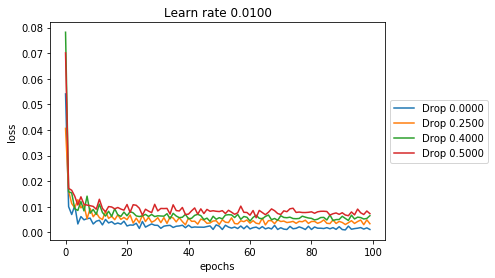


Learn rate: 0.0010
---------------------
 > Dropout: 0.00 Training error: 0.0010	Testing error: 0.0211
 > Dropout: 0.25 Training error: 0.0012	Testing error: 0.0478
 > Dropout: 0.40 Training error: 0.0018	Testing error: 0.0813
 > Dropout: 0.50 Training error: 0.0019	Testing error: 0.0954


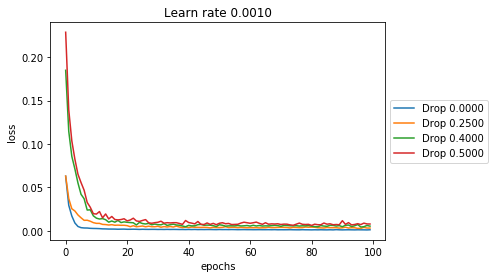


Learn rate: 0.0001
---------------------
 > Dropout: 0.00 Training error: 0.0022	Testing error: 0.0440
 > Dropout: 0.25 Training error: 0.0030	Testing error: 0.0406
 > Dropout: 0.40 Training error: 0.0031	Testing error: 0.0534
 > Dropout: 0.50 Training error: 0.0032	Testing error: 0.0370


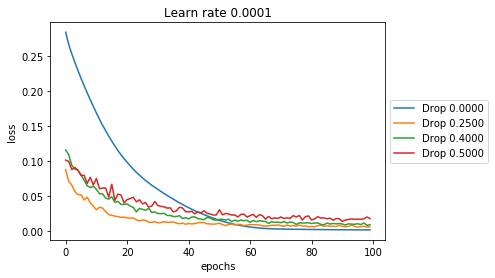

*** Best Live Model Summary***
Testing error: 0.0117
Best learning rate: 0.01
Best dropout rate: 0.25


In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

window_size = 10
dropouts =  [0.0,0.25,0.4,0.50]
learn_rates = [0.01,0.001,0.0001]
batch_size = 50
epochs_live = 100

def test_live(X_train,y_train,X_test,y_test):
    best_model = None
    lowest_test_error = 2.0
    best_learn_rate = 0.0
    best_dropout_rate = 0.0
    for rate in learn_rates:
        print("\nLearn rate: {0:.4f}".format(rate))
        print('---------------------')
        lengend = []
        for dropout in dropouts:
            model = live_model(X_train,y_train,rate,dropout)
            history = model.fit(X_train, y_train, epochs=epochs_live, batch_size=batch_size, verbose=0)

            # print out training and testing errors
            training_error = model.evaluate(X_train, y_train, verbose=0)
            testing_error = model.evaluate(X_test, y_test, verbose=0)
            msg = " > Dropout: {0:.2f} Training error: {1:.4f}\tTesting error: {2:.4f}"
            print(msg.format(dropout, training_error,testing_error))
            
            #check if test error
            if lowest_test_error > testing_error:
                best_model = model
                lowest_test_error = testing_error
                best_learn_rate = rate
                best_dropout_rate = dropout
                
            #plot loss function
            plt.plot(history.history['loss'])
            lengend.append("Drop {0:.4f}".format(dropout)) 
    
        plt.title("Learn rate {0:.4f}".format(rate))
        plt.xlabel('epochs')
        plt.ylabel('loss')
        plt.legend(lengend,loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()
    
    return (best_model,lowest_test_error,best_learn_rate,best_dropout_rate)


seq_obj = MultiSequence(ticker,window_size,1)
dataset = seq_obj.original_data
X_train,y_train,X_test,y_test = split_data(seq_obj)

print("*** Live Model Testing ***")
print("=" * 40)        
results = test_live(X_train,y_train,X_test,y_test)


print("*** Best Live Model Summary***")
print("=" * 40) 
print("Testing error: {0:.4f}".format(results[1]))
print("Best learning rate: {}".format(results[2]))
print("Best dropout rate: {}".format(results[3]))

This code performs live model testing using a recurrent neural network (RNN) architecture called LSTM (Long Short-Term Memory) for a specific stock.

The code begins by importing the necessary libraries, including `%matplotlib inline` to enable inline plotting and `matplotlib.pyplot` for creating plots.

Next, it sets the values for various parameters such as `window_size`, `dropouts`, `learn_rates`, `batch_size`, and `epochs_live`. It defines a function test_live that accepts training and testing data (X_train, Y_train, X_test, Y_test). Inside this function, it iterates over different learning rates (`learn_rates`) and dropout rates (`dropouts`) combinations. A live model is created with the corresponding learning rate and dropout rate for each combination. The model is trained using the training data for a specified number of epochs (`epochs_live`) and batch size (`batch_size`). The training and testing errors are calculated after the model has been trained. Based on the performance of each model, the model with the lowest testing error is identified as the best model. Additionally, the loss function values are plotted for each combination of learning rate and dropout rate.

Once the testing process is complete, the best model, along with its corresponding testing error, learning rate, and dropout rate, is returned from the `test_live` function.

The code then creates a `MultiSequence` object based on the given stock and window size. It extracts the dataset from the sequence object and splits it into training and testing data. Testing of the model takes place by calling the test_live function. The results are stored in the `results` variable.

Finally, a summary of the best live model is printed, which includes the testing error, the best learning rate, and the best dropout rate. LSTM-based models are used in this code to test live models for a specific stock. Based on the lowest testing error, the model is iterated over different combinations of learning rates and dropout rates, trained, evaluated, and identified as the best model. In addition to visualizing the loss function values, the code prints a summary of the performance of the best live model.

In [17]:
#get fourt tickers to perform out epoch test
ticker_epochs = [tickers[i][1] for i in range(4)]

window_size = 10
dropout_rate = 0.25
epochs_list = [50,100,200,500,1000]
batch_size = 50
learn_rate = 0.001

def test_epochs():
    """
    
    """
    for symbol in ticker_epochs:
        print("\nSymbol: {}".format(symbol))
        print('---------------------')
        seq_obj = MultiSequence(symbol,window_size,1)
        X_train,y_train,X_test,y_test = split_data(seq_obj)
        lowest_test_error = 2.0
        best_epoch = 0
        for epoch in epochs_list:
            model = live_model(X_train,y_train,learn_rate,dropout_rate)
            model.fit(X_train, y_train, epochs=epoch, batch_size=batch_size, verbose=0)

            # print out training and testing errors
            training_error = model.evaluate(X_train, y_train, verbose=0)
            testing_error = model.evaluate(X_test, y_test, verbose=0)
            msg = " > Epoch: {0:} \tTraining error: {1:.4f}\tTesting error: {2:.4f}"
            print(msg.format(epoch, training_error,testing_error))

            if lowest_test_error > testing_error:
                lowest_test_error = testing_error
                best_epoch = epoch
        
        #print best epoch for symbol
        print(" ==> Best epoch {0:} with testing error of {1:.4f}".format(best_epoch,lowest_test_error))

print("*** Epoch Model Testing ***")
print("=" * 40)        
test_epochs()

*** Epoch Model Testing ***

Symbol: MMM
---------------------
 > Epoch: 50 	Training error: 0.0040	Testing error: 0.0040
 > Epoch: 100 	Training error: 0.0032	Testing error: 0.0042
 > Epoch: 200 	Training error: 0.0029	Testing error: 0.0038
 > Epoch: 500 	Training error: 0.0027	Testing error: 0.0037
 > Epoch: 1000 	Training error: 0.0024	Testing error: 0.0039
 ==> Best epoch 500 with testing error of 0.0037

Symbol: AXP
---------------------
 > Epoch: 50 	Training error: 0.0030	Testing error: 0.0326
 > Epoch: 100 	Training error: 0.0026	Testing error: 0.0264
 > Epoch: 200 	Training error: 0.0024	Testing error: 0.0132
 > Epoch: 500 	Training error: 0.0025	Testing error: 0.0064
 > Epoch: 1000 	Training error: 0.0020	Testing error: 0.0075
 ==> Best epoch 500 with testing error of 0.0064

Symbol: AAPL
---------------------
 > Epoch: 50 	Training error: 0.0017	Testing error: 0.0817
 > Epoch: 100 	Training error: 0.0014	Testing error: 0.0639
 > Epoch: 200 	Training error: 0.0010	Testing err

This code performs an epoch model testing for a selected set of tickers. The first step is to define the variable ticker_epochs, which contains a selection of tickers taken from a larger list. These tickers will be used for the epoch model testing. Afterward, the code sets window size, dropout rate, epochs list, batch size, and learn rate. These parameters will be used during the model testing process.

The code defines a function `test_epochs` which does not contain any code implementation.

Within the `test_epochs` function, a loop is executed for each symbol in the `ticker_epochs` list. Code prints symbol names and creates a MultiSequence object based on symbol, window size, and step size. The data is split into training and testing sets using the `split_data` function. The code then initializes the variables lowest_test_error and best_epoch. These variables will keep track of the lowest testing error and the corresponding best epoch during the testing process. The code then creates a live model using the live_model function with the specified learn rate and dropout rate. The model is trained on the training data for a specific number of epochs and batch size. Training and testing errors are calculated after training. The errors are printed for each epoch value.

The code compares the testing error with the current lowest testing error and updates the `lowest_test_error` and `best_epoch` variables if a new lowest testing error is found.

Finally, the code prints the best epoch value and its corresponding testing error for each symbol.

The code then prints a header indicating the start of the epoch model testing process. The `test_epochs` function is called to execute the testing. This code tests the epoch model for selected tickers. For each ticker, it creates a `MultiSequence` object, splits the data, and trains a live model for different epoch values. Based on the lowest testing error, the model's performance is evaluated and the best epoch value is identified. Each ticker's results are printed by the code.

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

ticker = tickers[0][1]
window_sizes = [5,7,10]
dropouts =  [0.0,0.25,0.4]
learn_rates = [0.01,0.001]
epochs = [100,200,500]
batch_size = 50

def best_model(ticker, window_sizes, learn_rates, dropouts, epochs, batch_size):
    """
    
    """
    #our best model variables
    best_model = None
    lowest_test_error = 2.0
    best_training_error =0.0
    best_learn_rate = 0.0
    best_dropout_rate = 0.0
    best_epoch = 0
    best_window_size = 0
    
    counter = 1
    
    for window_size in window_sizes:
        print("\nWindow size: {}".format(window_size))
        print('---------------------')
        
        #prepare our sequence data
        seq_obj = MultiSequence(ticker,window_size,1)
        X_train,y_train,X_test,y_test = split_data(seq_obj)    
    
        for rate in learn_rates:
            for dropout in dropouts:
                for epoch in epochs:
                    model = live_model(X_train,y_train,rate,dropout)
                    model.fit(X_train, y_train, epochs=epoch, batch_size=batch_size, verbose=0)

                    # print out training and testing errors
                    training_error = model.evaluate(X_train, y_train, verbose=0)
                    testing_error = model.evaluate(X_test, y_test, verbose=0)
                    msg = " > Learn rate: {0:.4f} Dropout: {1:.2f}"
                    msg += " Epoch: {2:} Training error: {3:.4f} Testing error: {4:.4f}"
                    msg = str(counter) + "   " +msg.format(rate,dropout, epoch, training_error, testing_error)
                    print(msg)

                    #check if test error 
                    if lowest_test_error > testing_error:
                        best_model = model
                        lowest_test_error = testing_error
                        best_learn_rate = rate
                        best_dropout_rate = dropout
                        best_epoch = epoch
                        best_training_error = training_error 
                        best_window_size = window_size
                    
                    #increase our print counter
                    counter += 1
                        
    best_dict ={}
    best_dict["ticker"] = ticker
    best_dict["model"] = best_model
    best_dict["test_error"] =   "{0:.4f}".format(lowest_test_error) 
    best_dict["learn_rate"] = best_learn_rate
    best_dict["dropout"] = best_dropout_rate
    best_dict["epoch"] = best_epoch
    best_dict["train_error"] =  "{0:.4f}".format(best_training_error)  
    best_dict["window_size"] = best_window_size
    
    return best_dict


print("*** Best Model Selection for {} ***".format(ticker))
print("=" * 40)      
results = best_model(ticker, window_sizes, learn_rates, dropouts, epochs, batch_size)

*** Best Model Selection for MMM ***

Window size: 5
---------------------
1    > Learn rate: 0.0100 Dropout: 0.00 Epoch: 100 Training error: 0.0039 Testing error: 0.0044
2    > Learn rate: 0.0100 Dropout: 0.00 Epoch: 200 Training error: 0.0023 Testing error: 0.0044
3    > Learn rate: 0.0100 Dropout: 0.00 Epoch: 500 Training error: 0.0012 Testing error: 0.0055
4    > Learn rate: 0.0100 Dropout: 0.25 Epoch: 100 Training error: 0.0045 Testing error: 0.0047
5    > Learn rate: 0.0100 Dropout: 0.25 Epoch: 200 Training error: 0.0040 Testing error: 0.0044
6    > Learn rate: 0.0100 Dropout: 0.25 Epoch: 500 Training error: 0.0030 Testing error: 0.0053
7    > Learn rate: 0.0100 Dropout: 0.40 Epoch: 100 Training error: 0.0047 Testing error: 0.0057
8    > Learn rate: 0.0100 Dropout: 0.40 Epoch: 200 Training error: 0.0053 Testing error: 0.0056
9    > Learn rate: 0.0100 Dropout: 0.40 Epoch: 500 Training error: 0.0034 Testing error: 0.0072
10    > Learn rate: 0.0010 Dropout: 0.00 Epoch: 100 Training 

This code performs the selection of the best model for a given stock ticker.

The code begins by importing the necessary libraries, including `%matplotlib inline` for inline plotting and `matplotlib.pyplot` for creating plots.

Next, it initializes variables such as `ticker`, `window_sizes`, `dropouts`, `learn_rates`, `epochs`, and `batch_size`. These variables define the parameters for model selection. This code defines a function that takes as inputs the ticker and the parameters mentioned above. Inside this function, variables are initialized to store the best model and its corresponding evaluation metrics. Nested loops are used to iterate over different combinations of window sizes, learning rates, dropouts, and epochs. In each combination, a live model is created using the live_model function. The model is trained and evaluated on the training and testing data.  During training, the training and testing errors are calculated, and a message is displayed to show the model's performance for each combination of parameters. If a lower testing error is found, the code updates the variables that store the best model and its associated metrics. By iterating through all possible combinations, this function increments This function loops until it finds the best model, its evaluation metrics, and its parameters. After the loops, the function returns the dictionary which contains the best model, its evaluation metrics, and its parameters. In the following line, the code prints the header that indicates the start of the selection process for the selected ticker. The `best_model` function is called with the given parameters, and the results are stored in the `results` variable.

Finally, the code prints a summary of the best model's selection, including the test error, learning rate, dropout rate, epoch, training error, and window size.

Using iteration over a number of parameters, this code selects the most appropriate model for a given stock ticker. It trains and evaluates live models, compares their performance based on testing error, and identifies the model with the lowest error. A summary of the best model's selection is presented in the code.

In [19]:
print("*** Best Model Selected Summary for {} ***".format(results["ticker"]))
print("=" * 40) 

print("Window size: {}".format(results["window_size"]))
print("Train error: {}".format(results["train_error"]))
print("Testing error: {}".format(results["test_error"]))
print("Learning rate: {}".format(results["learn_rate"]))
print("Dropout rate: {}".format(results["dropout"]))
print("Epochs: {}".format(results["epoch"]))

seq_obj = MultiSequence(results["ticker"],results["window_size"],1)
dataset = seq_obj.original_data
X_train,y_train,X_test,y_test = split_data(seq_obj)

graph_prediction(results["model"], X_train,X_test,dataset,results["window_size"])

*** Best Model Selected Summary for MMM ***
Window size: 7
Train error: 0.0031
Testing error: 0.0036
Learning rate: 0.001
Dropout rate: 0.0
Epochs: 100


A summary of the best model selected for a specific ticker is printed by this code. It also visualizes the model's predictions. The code prints a header that indicates the start of the summary. The header includes the ticker name retrieved from the `results` dictionary.

In order to create a visual separator, a line of equal signs is printed. In addition to printing the window size, training errors, testing errors, learning rates, and dropout rates, the code also prints the number of epochs of the selected best model. Each detail is printed using formatted strings and retrieved from the `results` dictionary. After this, a `MultiSequence` object is created using the ticker and window size from the `results` dictionary. The original data is extracted from the sequence object, and the data is split into training and testing sets using the `split_data` function. To visualize the model's predictions, the graph_prediction function is called. This function takes the best model (`results["model"]`), training and testing data (`X_train`, `X_test`), the original dataset (`dataset`), and the window size (`results["window_size"]`) as input. It generates a graph showing the model's predictions against the actual data. This code summarizes the best model's details, including its performance metrics. In addition, it generates a graph to visualize the model's predictions.